In [1]:
from matplotlib import pyplot as plt
import pyshtools as pysh
import numpy as np


In [2]:
clm = pysh.datasets.Earth.XGM2019E()
r_earth = 6371.0e3

In [3]:
latitudes = np.linspace(-85, 85, 100)
longitudes = np.linspace(0, 360, 100)

latitudes, longitudes = np.meshgrid(latitudes, longitudes)
gravity = np.zeros_like(latitudes)

In [4]:
# clm.expand(grid = "DH")
grav = clm.expand(lmax = 95).to_xarray()
print(grav.info())

latitudes = grav.lat.values
longitudes = grav.lon.values      
pot = grav.potential.values

xarray.Dataset {
dimensions:
	lat = 193 ;
	lon = 385 ;

variables:
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:actual_range = [90.0, -90.0] ;
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:actual_range = [0.0, 360.0] ;
	float64 radial(lat, lon) ;
		radial:actual_range = [-9.781790152782795, -9.766022895959763] ;
		radial:comment = pyshtools grid ;
		radial:nlat = 193 ;
		radial:nlon = 385 ;
		radial:lmax = 95 ;
		radial:kind = real ;
		radial:grid = DH ;
		radial:extend = True ;
		radial:sampling = 2 ;
		radial:title = gravity (radial) ;
		radial:long_name = $g_r$ ;
		radial:units = $m s^{-2}$ ;
	float64 theta(lat, lon) ;
		theta:actual_range = [-0.03343597317474194, 0.03341918103766421] ;
		theta:comment = pyshtools grid ;
		theta:nlat = 193 ;
		theta:nlon = 385 ;
		theta:lmax = 95 ;
		theta:kind = real ;
		theta:grid = DH ;
		theta:extend = True ;
		theta:sampling = 2 ;
		theta:title = gravity (theta) ;
		

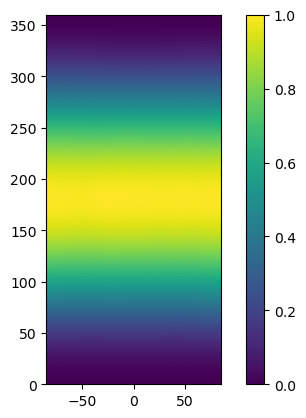

In [5]:
latitudes, longitudes = np.meshgrid(latitudes, longitudes, indexing='ij')


pot = pot - pot.min()
pot = pot / pot.max()

plt.imshow(pot, origin='lower', extent=[-85, 85, 0, 360])
plt.colorbar()
plt.show()

